# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
! pip install python-weather

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.1/355.1 kB 610.3 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.3
    Uninstalling aiohttp-3.8.3:
      Successfully uninstalled aiohttp-3.8.3


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"lat={city.lat}&lon={city.lng}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city.city_name))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city.city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gowurdak
Processing Record 2 of Set 1 | cumaribo
Processing Record 3 of Set 1 | mishan
Processing Record 4 of Set 1 | red bank
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | votkinsk
Processing Record 7 of Set 1 | ceeldheer
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | itaituba
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | coari
Processing Record 13 of Set 1 | enewetak
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | alesund
Processing Record 18 of Set 1 | colonia
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | inarajan village
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | san antonio de pale
Processing Record 23 of Set 1 | port 

Processing Record 42 of Set 4 | kapenguria
Processing Record 43 of Set 4 | minas de marcona
Processing Record 44 of Set 4 | skeldon
Processing Record 45 of Set 4 | constantia
Processing Record 46 of Set 4 | bontang
Processing Record 47 of Set 4 | volodarskiy
Processing Record 48 of Set 4 | klyuchi
Processing Record 49 of Set 4 | kroya
Processing Record 0 of Set 5 | el gouna
Processing Record 1 of Set 5 | ifatsy
Processing Record 2 of Set 5 | turpan
Processing Record 3 of Set 5 | hagi
Processing Record 4 of Set 5 | wajir
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | fada
City not found. Skipping...
Processing Record 7 of Set 5 | 'ohonua
Processing Record 8 of Set 5 | tobias barreto
Processing Record 9 of Set 5 | wailua homesteads
Processing Record 10 of Set 5 | karaidel'
Processing Record 11 of Set 5 | thompson
Processing Record 12 of Set 5 | carnarvon
Processing Record 13 of Set 5 | nar'yan-mar
Processing Record 14 of Set 5 | puerto san carlos
Processing Record

Processing Record 38 of Set 8 | tateyama
Processing Record 39 of Set 8 | vilyuchinsk
Processing Record 40 of Set 8 | renk
Processing Record 41 of Set 8 | kapuskasing
Processing Record 42 of Set 8 | polignano a mare
Processing Record 43 of Set 8 | hayma'
Processing Record 44 of Set 8 | fuglafjordur
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | hamilton
Processing Record 47 of Set 8 | paramonga
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Set 8 | gorontalo
Processing Record 0 of Set 9 | bardai
Processing Record 1 of Set 9 | tralee
Processing Record 2 of Set 9 | saudarkrokur
Processing Record 3 of Set 9 | papao
Processing Record 4 of Set 9 | debre tabor
Processing Record 5 of Set 9 | san luis de la loma
Processing Record 6 of Set 9 | taro
Processing Record 7 of Set 9 | jumla
Processing Record 8 of Set 9 | williams lake
Processing Record 9 of Set 9 | sinabang
Processing Record 10 of Set 9 | debark'
Processing Record 11 of Set 9 | plouzane
Proces

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gowurdak,37.8124,66.0466,13.08,60,16,0.25,TM,1700358749
1,cumaribo,4.4455,-69.7990,26.22,82,65,1.22,CO,1700358750
2,mishan,45.5500,131.8833,-3.32,79,99,3.35,CN,1700358751
3,red bank,33.9321,-81.2384,18.79,68,75,0.00,US,1700358752
4,ust-nera,64.5697,143.2370,-23.78,98,97,0.12,RU,1700358753


In [13]:
#!pip install citipy

In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gowurdak,37.8124,66.0466,13.08,60,16,0.25,TM,1700358749
1,cumaribo,4.4455,-69.7990,26.22,82,65,1.22,CO,1700358750
2,mishan,45.5500,131.8833,-3.32,79,99,3.35,CN,1700358751
3,red bank,33.9321,-81.2384,18.79,68,75,0.00,US,1700358752
4,ust-nera,64.5697,143.2370,-23.78,98,97,0.12,RU,1700358753


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [16]:
# set the current date variable for use by the scatter plot titles
current_date = time.strftime("%Y-%m-%d")

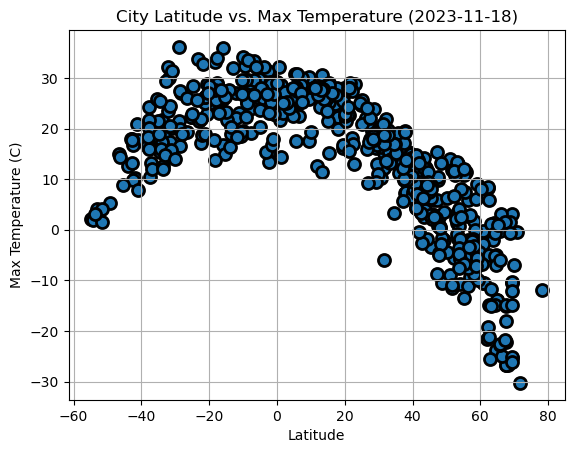

In [17]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({current_date})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

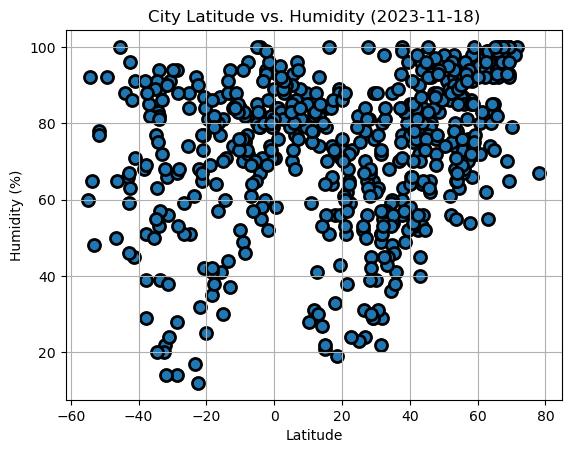

In [18]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

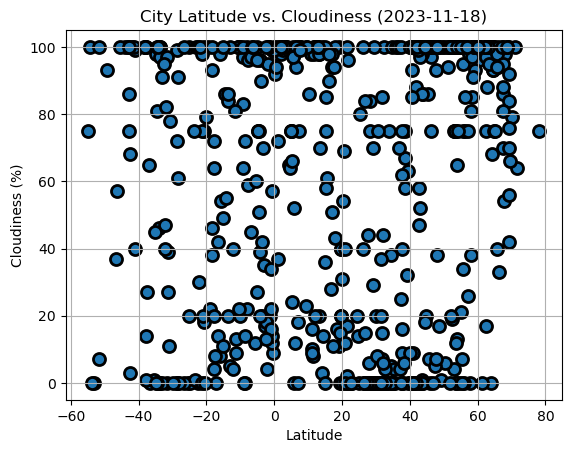

In [19]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

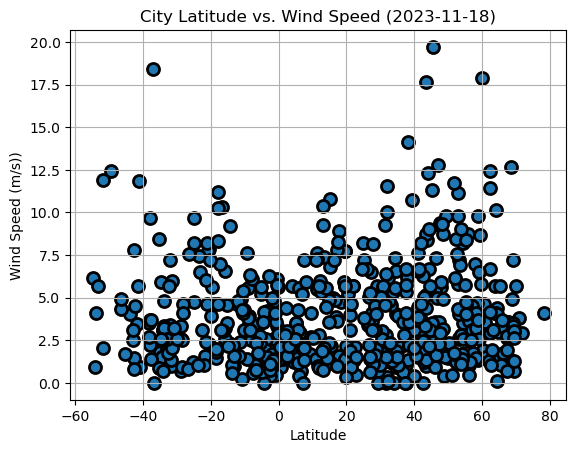

In [20]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s))")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


# Requirement 2: Compute Linear Regression for Each Relationship

In [21]:
# Define a function to create Linear Regression plots

def compute_and_plot_regression(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # if the slope is negative, add the annotation in the bottom left corner
    # otherwise put it in the bottom right corner
    if (slope < 0):
        line_x = x_values.min()
        line_y = y_values.min()
    else:
        line_x = (x_values.min() + x_values.max()) / 2
        line_y = y_values.min()
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(line_x, line_y), fontsize=15, color="red")
    print(f'The r-value is {rvalue**2}')

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gowurdak,37.8124,66.0466,13.08,60,16,0.25,TM,1700358749
1,cumaribo,4.4455,-69.7990,26.22,82,65,1.22,CO,1700358750
2,mishan,45.5500,131.8833,-3.32,79,99,3.35,CN,1700358751
3,red bank,33.9321,-81.2384,18.79,68,75,0.00,US,1700358752
4,ust-nera,64.5697,143.2370,-23.78,98,97,0.12,RU,1700358753


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,ushuaia,-54.8108,-68.3159,2.14,60,75,6.17,AR,1700358757
9,itaituba,-4.2761,-55.9836,29.09,79,96,1.54,BR,1700358758
10,waitangi,-43.9535,-176.5597,12.68,88,100,4.02,NZ,1700358759
11,coari,-4.0850,-63.1414,27.85,67,39,1.52,BR,1700358615
15,albany,-35.0269,117.8837,18.30,77,98,1.79,AU,1700358763


###  Temperature vs. Latitude Linear Regression Plot

In [24]:
 #!pip install python-weather

The r-value is 0.7769680084771375


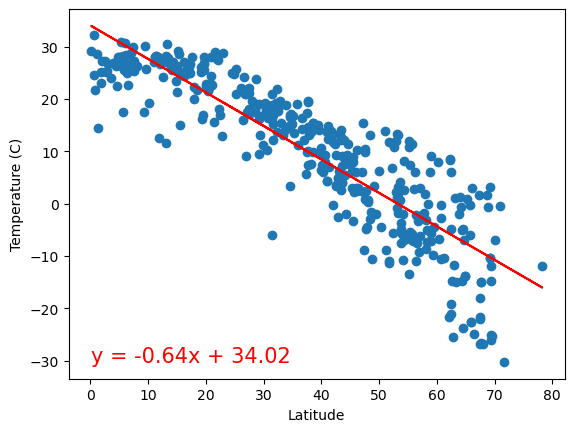

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
compute_and_plot_regression(x_values, y_values, "Latitude", "Temperature (C)")

The r-value is 0.4068115624212326


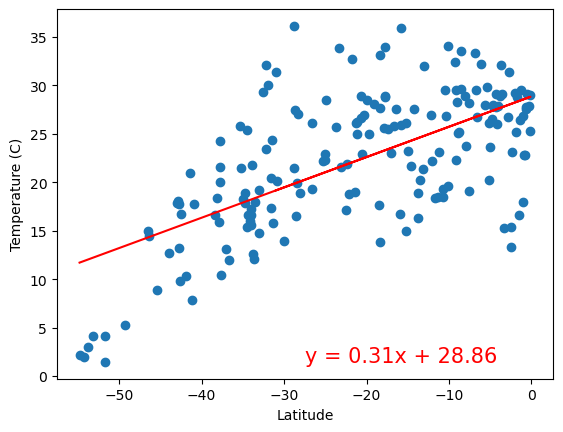

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
compute_and_plot_regression(x_values, y_values, "Latitude", "Temperature (C)")

**Discussion about the linear relationship:** In both hemispheres, the correlation between humidity and proximity to the equator is either non-existent or extremely weak (r < 0.3).

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1023683562862392


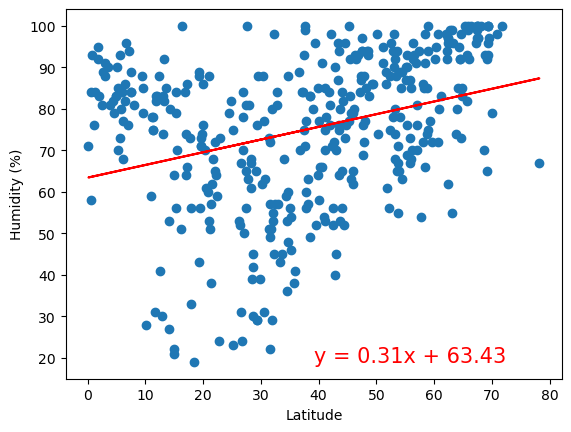

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
compute_and_plot_regression(x_values, y_values, "Latitude", "Humidity (%)")

The r-value is 0.034352995987775574


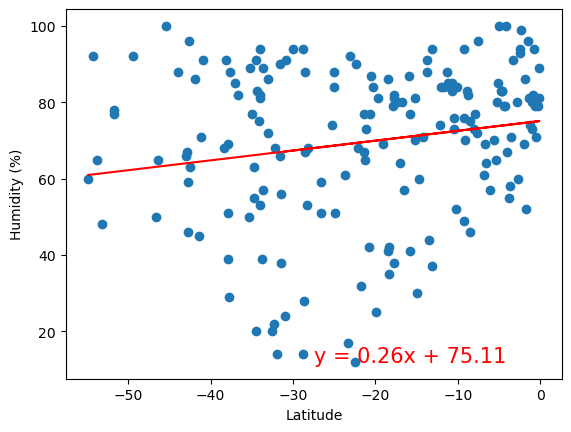

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
compute_and_plot_regression(x_values, y_values, "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, there is a weak or nonexistent correlation between latitude and humidity as indicated by the low r-values. This suggests that humidity is not significantly linked to latitude, and possibly not linked at all.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.03520879380007605


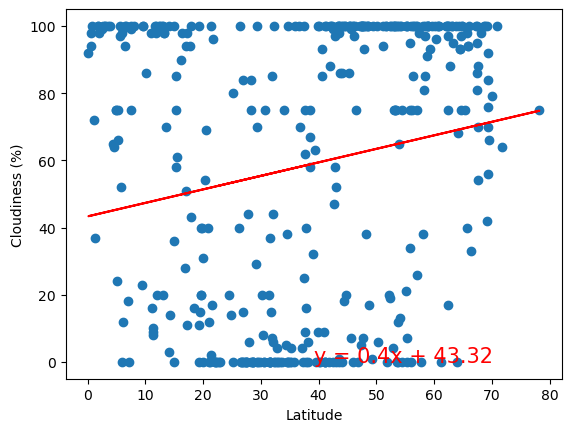

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
compute_and_plot_regression(x_values, y_values, "Latitude", "Cloudiness (%)")

The r-value is 0.000698416552292788


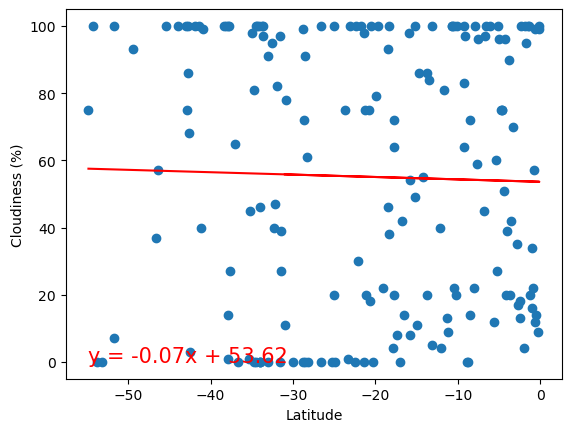

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
compute_and_plot_regression(x_values, y_values, "Latitude", "Cloudiness (%)")


**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, there is a weak or negligible correlation between latitude and cloudiness, as evidenced by the r-values. This implies that cloudiness is not strongly associated with latitude and may not have a significant relationship at all.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.007308495907408183


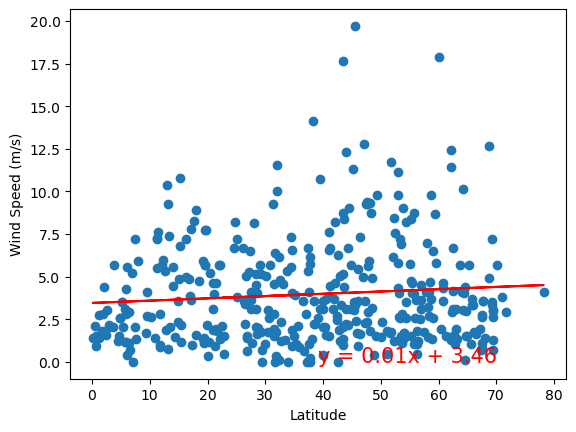

In [35]:

# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
compute_and_plot_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)")

The r-value is 0.02702935846898365


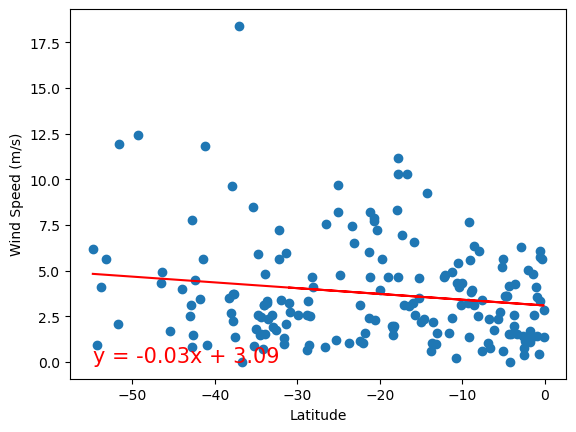

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
compute_and_plot_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the r-values show a weak or negligible correlation between latitude and cloudiness. This suggests that cloudiness is not strongly linked to latitude and may not have a significant relationship at all.
